In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

fm.get_fontconfig_fonts()
font_location = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
fprop = fm.FontProperties(fname=font_location)


train = pd.read_csv("data/train_data.csv",encoding="utf-8",index_col=False)
test = pd.read_csv("data/test_data.csv",index_col=False)

In [2]:
three_dot_in_sentence = []
for sentence, label in zip(train['title'],train['topic_idx']):
    if "..." in sentence:
#         print(sentence)
        three_dot_in_sentence.append((sentence,label))
        
three_dot_in_sentence[:10]

[('셰이크 살만 AFC 회장 평양 방문…최휘 국가체육지도위원장...', 4),
 ('데얀·김치우 OUT 조영욱 IN…서울 과감한 재건 성과...', 5),
 ('아시안게임 만리장성 맞서는 농구 단일팀 이문규 감독...', 5),
 ('한화 4천20일 만의 PS vs 넥센 4년 만의 PO...', 5),
 ('아시안게임 경기장 잔디 점검한 김학범 중동팀에 유리한...', 5),
 ('아가메즈·비예나 등 V리그 외국인 선수 대거 입국…KOVO...', 5),
 ('1보 류현진 한국인 첫 MLB 올스타전 선발로 1이닝...', 5),
 ('아시안게임 여자축구 전가을 황금세대 책임감으로 새 역...', 5),
 ('프로농구 KBL 음주 운전 kt 박철호에 36경기 출전 ...', 5),
 ('먼저 2승 최태웅 감독 우승 기회 왔다. 철저히 준비...', 5)]

In [3]:
num = 0
for sentence, label in three_dot_in_sentence:
    if label != 5:
        num+=1
        print(sentence, label)
        
print(num)
print(len(three_dot_in_sentence))

셰이크 살만 AFC 회장 평양 방문…최휘 국가체육지도위원장... 4
셰이크 살만 AFC 회장 평양 방문…北 방북목적 등 언급... 4
영화 봄 여름 가을 겨울 그리고... 봄을 현대무용으로 옮기다. 3
MLB스카우트 몰고 다니는 린드블럼 미국 진출 내 의지... 4
15년 만에 외국인 챔피언전 MVP 화이트 팀 우승만 신... 4
프랑스 마크롱 대통령 PSG회장에게 축하 좋은 소식 있... 4
검찰 조국 재소환 후 신병처리 검토...동생은 오늘 기소 2
송파구 건물 옥상 화재...인명피해 없어 2
인종 장벽 허문 로빈슨 탄생 100년…살아있으면 분노... 2
최강한파 대구 낮 최고 기온 영하 7.6도...83년만에 가장 낮아 3
터키 갈라타사라이 홈 록키 그림 응원현수막이 테러 메... 4
중계권 수입 증가 EPL 에이전트 지급액도 한해 2천억... 1
통일농구 방북단 평양行…조명균 평화 진전 계기 됐으면... 6
이면도로에 쌓인 눈... 출근길 조심하세요 3
유리천장 깬 박미희 감독 그냥 엄마 말고 강한 엄마 ... 3
MLB 인종장벽 허문 재키 로빈슨 첫 계약서 경매…57억원... 1
총에 맞은 오티스 보스턴 구단 비행기로 미국 이송…입원 ... 4
통일농구 선수단 평양도착…北 열렬히 축하…만날수록 정 통... 6
토종 거포 서재덕 공익 근무 시작…신인 김명관 활약... 2
네이마르 PSG이적 후 가장 먼저 한 일 등번호 10번... 4
극과 극...강원은 폭설 부산은 개나리 3
영상 감격 또 감격...백두산 정상에 선 두 정상 6
영상 베트남 총리 박항서 감독에 훈장…양국 국민 친... 4
촛불 3년...사회불평등 해소 촉구 2
차량털이범에 당한 전 MLB 거포 A.로드…피해액만 6억원... 4
美제재에 베네수 프로야구 못 열릴라…與정치인 우리라도 뛴... 4
법원 MBC정상화위 효력정지...사측 이의신청 2
듀랜트·커리 55점 합작…골든스테이트 클리블랜드 원정서 ... 4
정운찬 총재 병역 국민정서 반영 못해 죄송…미래협의회 ... 6
물러가는 동장군.

<AxesSubplot:>

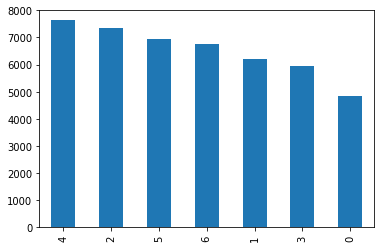

In [4]:
# datas with label
train["topic_idx"].value_counts().plot(kind="bar")


<AxesSubplot:>

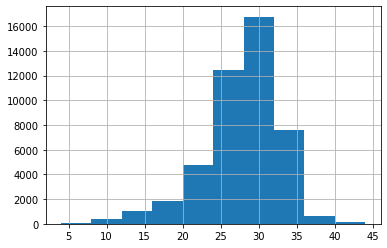

In [5]:
# string length
train["title"].str.len().hist()

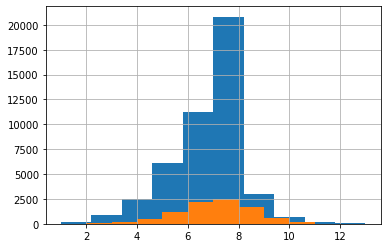

In [6]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

plot_word_number_histogram(train['title'])
plot_word_number_histogram(test['title'])

In [7]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [8]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [14]:
label_index_list = []
for i in range(7):
    label_index_list.append(train[train['topic_idx'] == i])

<AxesSubplot:>

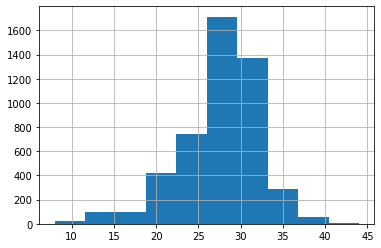

In [25]:
label_index_list[0]['title'].str.len().hist()

<AxesSubplot:>

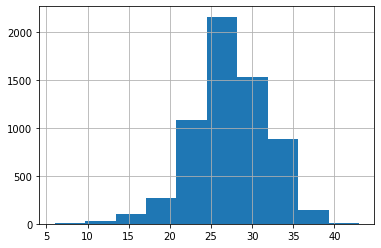

In [27]:
label_index_list[1]['title'].str.len().hist()

<AxesSubplot:>

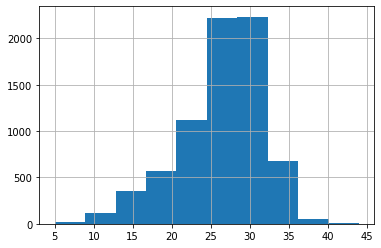

In [28]:
label_index_list[2]['title'].str.len().hist()

<AxesSubplot:>

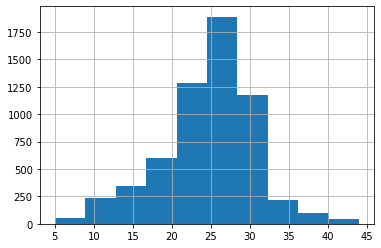

In [29]:
label_index_list[3]['title'].str.len().hist()

<AxesSubplot:>

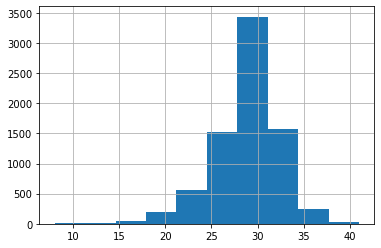

In [30]:
label_index_list[4]['title'].str.len().hist()

<AxesSubplot:>

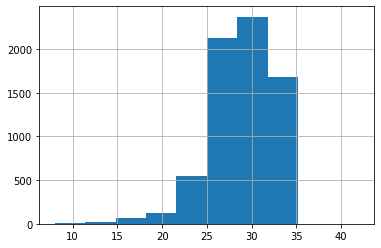

In [31]:
label_index_list[5]['title'].str.len().hist()

<AxesSubplot:>

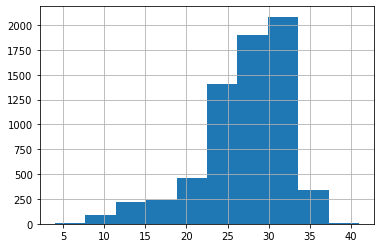

In [32]:
label_index_list[6]['title'].str.len().hist()

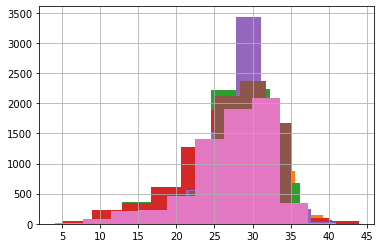

In [26]:
for i in range(7):
    label_index_list[i]['title'].str.len().hist()

In [ ]:
label_index_list[0]['title'].str.len().hist()

In [ ]:
from konlpy.tag import Kkma  
kkma=Kkma()  
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

In [11]:
from konlpy.tag import Mecab  
tokenizer = Mecab()
print(tokenizer.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [ ]:
train["tokenized"] = [tokenizer.morphs(sentence) for sentence in train["title"]]

In [ ]:
train.head()

In [ ]:
fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
plt.legend(prop=fprop)
rows = 3
cols = 3
i = 1

from collections import defaultdict

def plot_top_stopwords_barchart2(tokenized_list):
    dic = defaultdict(int)
    for tokenized in tokenized_list:
        for tok in tokenized:
            if len(tok) == 1:
                continue
            dic[tok] += 1

    top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30]

    x, y = zip(*top)
    return x, y

for i in range(7):
    x,y = plot_top_stopwords_barchart2(train[train['topic_idx']==i]['tokenized'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    ax.bar(x,y)
    print(x)
    print(y)

In [ ]:
for i in range(7):
    x,y = plot_top_stopwords_barchart2(train[train['topic_idx']==i]['tokenized'])
    print(x)
    print(y)

In [ ]:
x,y